In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio
import cv2
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc
from scipy import fftpack
import matplotlib.pylab as pylab
from math import ceil
from math import *
import random

In [65]:
#dct and idct
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

Text(0.5, 1.0, 'Baboon')

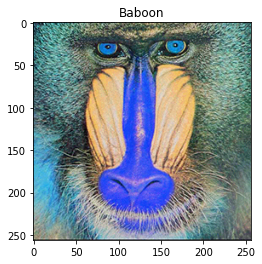

In [66]:
#reading image
img=cv2.imread('baboon256.png')
plt.figure()
plt.imshow(img)
plt.title('Baboon')

(256, 256)


True

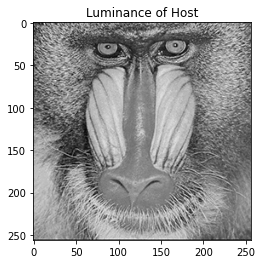

In [67]:
transcol=cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plt.figure()
plt.imshow(transcol[:,:,0],cmap='gray')
plt.title('Luminance of Host')
luminance_part_baboon=transcol[:,:,0]
print(luminance_part_baboon.shape)
filename = 'hostY.png'
cv2.imwrite(filename, luminance_part_baboon)

In [68]:
def generate_secret_key1():
  secret_key1=""
  for i in range(0,192):
    k=random.randint(0,1)
    secret_key1+=str(k)
  return secret_key1

(256, 256)


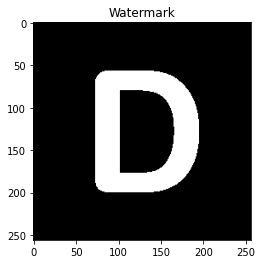

In [69]:
img_grey = cv2.imread('watermark.png', cv2.IMREAD_GRAYSCALE)
thresh = 128
binary_watermark = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(binary_watermark,cmap='gray')
print(binary_watermark.shape)
plt.title( "Watermark")
secret_key1=generate_secret_key1()

True

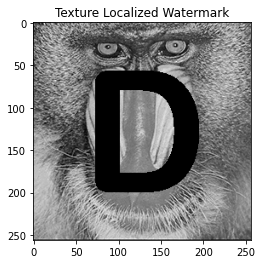

In [70]:
imsize = luminance_part_baboon.shape
texture_localized_watermark = np.zeros(imsize)
for i in range(0,256):
  for j in range(0,256):
    if(binary_watermark[i][j]==255):
      texture_localized_watermark[i][j]=0
    else:
      texture_localized_watermark[i][j]=luminance_part_baboon[i][j]
# for i in range(0,256):
#   for j in range(0,256):
#     if(i>=0 and i<32 and j>=0 and j<32):
#       continue
#     else:
#       texture_localized_watermark[i][j]=luminance_part_baboon[i][j]
plt.figure()
plt.imshow(texture_localized_watermark,cmap='gray')
plt.title('Texture Localized Watermark')

filename = 'textureLocalized.png'
cv2.imwrite(filename, texture_localized_watermark)

Text(0.5, 1.0, 'DCT of Baboon')

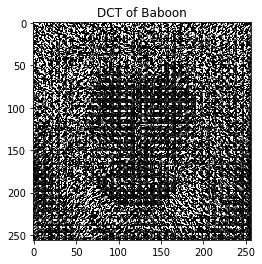

In [71]:
imsize = luminance_part_baboon.shape
dct_of_baboon = np.zeros(imsize)
blocks_dct_luminance=[]
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct_of_baboon[i:(i+8),j:(j+8)] = dct2( luminance_part_baboon[i:(i+8),j:(j+8)] )
        blocks_dct_luminance.append(dct_of_baboon[i:(i+8),j:(j+8)])
plt.figure()
plt.imshow(dct_of_baboon,cmap='gray',vmax = np.max(dct_of_baboon)*0.01,vmin = 0)
plt.title( "DCT of Baboon")

Text(0.5, 1.0, 'DCT of Texture localized watermark')

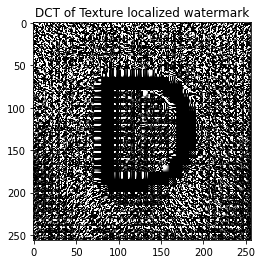

In [72]:
imsize = texture_localized_watermark.shape
dct_of_texture_localized_watermark = np.zeros(imsize)
blocks_dct_texture=[]
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct_of_texture_localized_watermark[i:(i+8),j:(j+8)] = dct2( texture_localized_watermark[i:(i+8),j:(j+8)] )
        blocks_dct_texture.append(dct_of_texture_localized_watermark[i:(i+8),j:(j+8)])
plt.figure()
plt.imshow(dct_of_texture_localized_watermark,cmap='gray',vmax = np.max(dct_of_texture_localized_watermark)*0.01,vmin = 0)
plt.title( "DCT of Texture localized watermark")


In [73]:
secret_key2=""
for i in range(0,16):
  secret_key2+=secret_key1
print(secret_key2)


1110011001100110110001101110000010110001111001100000100000111110011100010010110010110000101101011010011111100111011000100100001001011111010010000111010001011111011001001010011001110011100001101110011001100110110001101110000010110001111001100000100000111110011100010010110010110000101101011010011111100111011000100100001001011111010010000111010001011111011001001010011001110011100001101110011001100110110001101110000010110001111001100000100000111110011100010010110010110000101101011010011111100111011000100100001001011111010010000111010001011111011001001010011001110011100001101110011001100110110001101110000010110001111001100000100000111110011100010010110010110000101101011010011111100111011000100100001001011111010010000111010001011111011001001010011001110011100001101110011001100110110001101110000010110001111001100000100000111110011100010010110010110000101101011010011111100111011000100100001001011111010010000111010001011111011001001010011001110011100001101110011001100110110001101110000010110001

In [74]:
def binToDeci(binary_num):
    dec_num = int(binary_num, 2)
    return dec_num 

In [75]:
imsize = texture_localized_watermark.shape
watermarked_image_preidct = np.zeros(imsize)
count=0
k=[]
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        num = random.randint(0,7)
        k.append(num)
        if(blocks_dct_texture[count][0][0]!=blocks_dct_luminance[count][0][0]):
          if(num==0 or num==1):
            blocks_dct_luminance[count][0][1]=blocks_dct_luminance[count][1][0]+blocks_dct_luminance[count][1][1]+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          if(num==2):
            blocks_dct_luminance[count][1][0]=(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][2][0])/2+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          if(num==3):
            blocks_dct_luminance[count][1][1]=(blocks_dct_luminance[count][0][2]+blocks_dct_luminance[count][1][0])/3+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          if(num==4):
            blocks_dct_luminance[count][0][2]=(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][1][1])/4+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          if(num==5):
            blocks_dct_luminance[count][2][0]=(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][1][0])/5+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          if(num==6):
            blocks_dct_luminance[count][1][2]=(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][2][1])/6+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          if(num==7):
            blocks_dct_luminance[count][2][1]=(blocks_dct_luminance[count][1][2]+blocks_dct_luminance[count][1][0])/7+random.randint(1,int(blocks_dct_luminance[count][0][0]/2))
          watermarked_image_preidct[i:(i+8),j:(j+8)]=blocks_dct_luminance[count]
        else:
          watermarked_image_preidct[i:(i+8),j:(j+8)]=blocks_dct_luminance[count]
        count=count+1


True

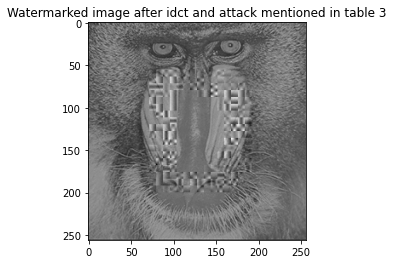

In [76]:
imsize = watermarked_image_preidct.shape
idct = np.zeros(imsize)
count=0
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
      idct[i:(i+8),j:(j+8)]=idct2(watermarked_image_preidct[i:(i+8),j:(j+8)])
plt.figure()
plt.imshow(idct,cmap='gray')
plt.title( "Watermarked image after idct and attack mentioned in table 3")

filename = 'Watermarked.png'
cv2.imwrite(filename, idct)

1024


Text(0.5, 1.0, 'Extracted watermark')

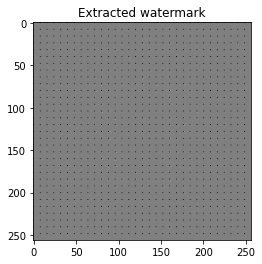

In [77]:
imsize = watermarked_image_preidct.shape
extracted_watermark = np.zeros(imsize)
count=0
print(len(blocks_dct_luminance))
# for i in range(0,len(blocks_dct_luminance)):
#   for j in range(0,1):
#     blocks_dct_luminance[i][2][0]=blocks_dct_luminance[i][2][0]+2
#     blocks_dct_luminance[i][0][2]=blocks_dct_luminance[i][0][2]+2
    # blocks_dct_luminance[i][random.randint(0,2)][random.randint(0,2)]=blocks_dct_luminance[i][random.randint(0,2)][random.randint(0,2)]+blocks_dct_luminance[i][random.randint(0,2)][random.randint(0,2)]/random.randint(1,7)
imsize = texture_localized_watermark.shape
modified_watermarked = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
      modified_watermarked[i:(i+8),j:(j+8)]=blocks_dct_luminance[count]
      modified_watermarked[i:(i+8),j:(j+8)]=idct2(modified_watermarked[i:(i+8),j:(j+8)])
      count=count+1
filename = 'Watermarked_modified.png'
cv2.imwrite(filename, modified_watermarked)
count=0
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
      key_val=k[count]
      if(key_val==0 or key_val==1):
        if(blocks_dct_luminance[count][0][1]==(blocks_dct_luminance[count][1][0]+blocks_dct_luminance[count][1][1])):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      if(key_val==2):
        if(blocks_dct_luminance[count][1][0]==(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][2][0])/2):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      if(key_val==3):
        if(blocks_dct_luminance[count][1][1]==(blocks_dct_luminance[count][0][2]+blocks_dct_luminance[count][1][0])/3):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      if(key_val==4):
        if(blocks_dct_luminance[count][0][2]==(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][1][1])/4):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      if(key_val==5):
        if(blocks_dct_luminance[count][2][0]==(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][1][0])/5):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      if(key_val==6):
        if(blocks_dct_luminance[count][1][2]==(blocks_dct_luminance[count][0][1]+blocks_dct_luminance[count][2][1])/6):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      if(key_val==7):
        if(blocks_dct_luminance[count][2][1]==(blocks_dct_luminance[count][1][2]+blocks_dct_luminance[count][1][0])/7):
          blocks_dct_luminance[count][0][0]=2000
        else:
          blocks_dct_luminance[count][0][0]=-2000
      count=count+1
count=0
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
      extracted_watermark[i:(i+8),j:(j+8)]=blocks_dct_luminance[count]
      count=count+1
plt.figure()
plt.imshow(extracted_watermark,cmap='gray',vmax =2000,vmin = -2000)
plt.title( "Extracted watermark")

True

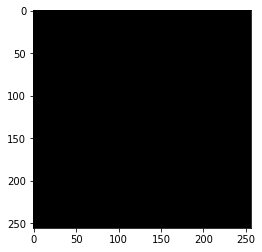

In [78]:
imsize = extracted_watermark.shape
extracted_idct = np.zeros(imsize)
count=0
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
      extracted_idct[i:(i+8),j:(j+8)]=idct2(extracted_watermark[i:(i+8),j:(j+8)])
thresh = 128
binary_watermark_idct= cv2.threshold(extracted_idct, thresh, 255, cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(binary_watermark_idct,cmap='gray')
cv2.imwrite("extracted_watermark.png",binary_watermark_idct)


In [79]:
count_1=0
count_2=0
l=0
for i in range(0,256):
  for j in range(0,256):
    if(binary_watermark_idct[i][j]==binary_watermark[i][j]):
      count_1+=1
    else:
      count_2+=1
res=(abs(count_1-count_2))/65536
print("µ:",round(res,4))

count_1=0
count_2=0
l=0
for i in range(0,256):
  for j in range(0,256):
    if(binary_watermark[i][j]==255):
      l+=1
      if(binary_watermark_idct[i][j]==binary_watermark[i][j]):
        count_1+=1
      else:
        count_2+=1
res=(abs(count_1-count_2))/l
print("µ(conditional)",round(res,4))

µ: 0.6869
µ(conditional) 1.0


In [80]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("hostY.png")
	compressed = cv2.imread("Watermarked.png", 1) 
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


PSNR value is 35.418565852843635 dB
